# Logistic Regression Modeling
---

In [1]:
## Print python version
from platform import python_version
print('Python Version:', python_version())

Python Version: 3.9.12


In [2]:
## Import libraries/packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams['figure.figsize'] = (18,10)
plt.rcParams['figure.max_open_warning'] = False
import patchworklib as pw
pw.overwrite_axisgrid()
from scipy.stats import zscore, pointbiserialr
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.graphics.mosaicplot import mosaic
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score
from sklearn.linear_model import LogisticRegression
import warnings
warnings.filterwarnings('ignore')

<Figure size 72x72 with 0 Axes>

In [3]:
df = pd.read_csv('churn_clean.csv').reset_index(drop=True)

# Research Question
---
> What variables impact customer churn?
---

# Data Preparation
---

In [4]:
## View data types
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 50 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   CaseOrder             10000 non-null  int64  
 1   Customer_id           10000 non-null  object 
 2   Interaction           10000 non-null  object 
 3   UID                   10000 non-null  object 
 4   City                  10000 non-null  object 
 5   State                 10000 non-null  object 
 6   County                10000 non-null  object 
 7   Zip                   10000 non-null  int64  
 8   Lat                   10000 non-null  float64
 9   Lng                   10000 non-null  float64
 10  Population            10000 non-null  int64  
 11  Area                  10000 non-null  object 
 12  TimeZone              10000 non-null  object 
 13  Job                   10000 non-null  object 
 14  Children              10000 non-null  int64  
 15  Age                 

In [5]:
## Rename survey columns
df.rename({
    'Item1':'TimelyResponse',
    'Item2':'TimelyFixes',
    'Item3':'TimelyReplacements',
    'Item4':'Reliability',
    'Item5':'Options',
    'Item6':'RespectfulResponse',
    'Item7':'CourteousExchange',
    'Item8':'ActiveListening'
}, axis=1, inplace=True)

In [6]:
## View summary statistics
df.describe()

,CaseOrder,Zip,Lat,Lng,Population,Children,Age,Income,Outage_sec_perweek,Email,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
count,10000.00000,10000.000000,10000.000000,10000.000000,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,...,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,5000.50000,49153.319600,38.757567,-90.782536,9756.562400,2.0877,53.078400,39806.926771,10.001848,12.016000,...,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,2886.89568,27532.196108,5.437389,15.156142,14432.698671,2.1472,20.698882,28199.916702,2.976019,3.025898,...,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,1.00000,601.000000,17.966120,-171.688150,0.000000,0.0000,18.000000,348.670000,0.099747,1.000000,...,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,2500.75000,26292.500000,35.341828,-97.082812,738.000000,0.0000,35.000000,19224.717500,8.018214,10.000000,...,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,5000.50000,48869.500000,39.395800,-87.918800,2910.500000,1.0000,53.000000,33170.605000,10.018560,12.000000,...,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,7500.25000,71866.500000,42.106908,-80.088745,13168.000000,3.0000,71.000000,53246.170000,11.969485,14.000000,...,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,10000.00000,99929.000000,70.640660,-65.667850,111850.000000,10.0000,89.000000,258900.700000,21.207230,23.000000,...,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [7]:
## Drop less meaningful columns
df = df.drop(['CaseOrder', 'Customer_id', 'Interaction', 'UID', 'City', 'State', 'County', 'Zip', 'Lat', 'Lng', 
              'Area', 'TimeZone', 'Job', 'Marital', 'Gender', 'Email', 'Multiple', 'OnlineSecurity',
              'OnlineBackup', 'DeviceProtection', 'TechSupport', 'PaperlessBilling', 'PaymentMethod'
             ], axis=1)

In [8]:
## Create copy of dataframe
df1 = df.copy()

In [9]:
## Check for missing values
df1.isna().sum()

Population              0
Children                0
Age                     0
Income                  0
Churn                   0
Outage_sec_perweek      0
Contacts                0
Yearly_equip_failure    0
Techie                  0
Contract                0
Port_modem              0
Tablet                  0
InternetService         0
Phone                   0
StreamingTV             0
StreamingMovies         0
Tenure                  0
MonthlyCharge           0
Bandwidth_GB_Year       0
TimelyResponse          0
TimelyFixes             0
TimelyReplacements      0
Reliability             0
Options                 0
RespectfulResponse      0
CourteousExchange       0
ActiveListening         0
dtype: int64

In [10]:
## Check for duplicate values
df1.duplicated().value_counts()

False    10000
dtype: int64

In [11]:
## Check for outliers
df1.describe()

,Population,Children,Age,Income,Outage_sec_perweek,Contacts,Yearly_equip_failure,Tenure,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
count,10000.000000,10000.0000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000,10000.000000
mean,9756.562400,2.0877,53.078400,39806.926771,10.001848,0.994200,0.398000,34.526188,172.624816,3392.341550,3.490800,3.505100,3.487000,3.497500,3.492900,3.497300,3.509500,3.495600
std,14432.698671,2.1472,20.698882,28199.916702,2.976019,0.988466,0.635953,26.443063,42.943094,2185.294852,1.037797,1.034641,1.027977,1.025816,1.024819,1.033586,1.028502,1.028633
min,0.000000,0.0000,18.000000,348.670000,0.099747,0.000000,0.000000,1.000259,79.978860,155.506715,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
25%,738.000000,0.0000,35.000000,19224.717500,8.018214,0.000000,0.000000,7.917694,139.979239,1236.470827,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000,3.000000
50%,2910.500000,1.0000,53.000000,33170.605000,10.018560,1.000000,0.000000,35.430507,167.484700,3279.536903,3.000000,4.000000,3.000000,3.000000,3.000000,3.000000,4.000000,3.000000
75%,13168.000000,3.0000,71.000000,53246.170000,11.969485,2.000000,1.000000,61.479795,200.734725,5586.141370,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000
max,111850.000000,10.0000,89.000000,258900.700000,21.207230,7.000000,6.000000,71.999280,290.160419,7158.981530,7.000000,7.000000,8.000000,7.000000,7.000000,8.000000,7.000000,8.000000


In [12]:
## Separate object variables
df2 = pd.DataFrame([df1[col] for col in df1.columns if df1[col].dtype != 'object']).transpose()

In [13]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            10000 non-null  float64
 1   Children              10000 non-null  float64
 2   Age                   10000 non-null  float64
 3   Income                10000 non-null  float64
 4   Outage_sec_perweek    10000 non-null  float64
 5   Contacts              10000 non-null  float64
 6   Yearly_equip_failure  10000 non-null  float64
 7   Tenure                10000 non-null  float64
 8   MonthlyCharge         10000 non-null  float64
 9   Bandwidth_GB_Year     10000 non-null  float64
 10  TimelyResponse        10000 non-null  float64
 11  TimelyFixes           10000 non-null  float64
 12  TimelyReplacements    10000 non-null  float64
 13  Reliability           10000 non-null  float64
 14  Options               10000 non-null  float64
 15  RespectfulResponse  

In [14]:
## Normalize data and exclude outliers
df2 = df2[zscore(df2).abs() < 3]

In [15]:
## Count outliers
df2.isna().sum()

Population              219
Children                191
Age                       0
Income                  145
Outage_sec_perweek       28
Contacts                165
Yearly_equip_failure     94
Tenure                    0
MonthlyCharge             0
Bandwidth_GB_Year         0
TimelyResponse           19
TimelyFixes              13
TimelyReplacements       13
Reliability               9
Options                  12
RespectfulResponse       13
CourteousExchange        11
ActiveListening          15
dtype: int64

In [16]:
## Drop outlier values
df2.dropna(inplace=True)

In [17]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9096 entries, 0 to 9999
Data columns (total 18 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9096 non-null   float64
 1   Children              9096 non-null   float64
 2   Age                   9096 non-null   float64
 3   Income                9096 non-null   float64
 4   Outage_sec_perweek    9096 non-null   float64
 5   Contacts              9096 non-null   float64
 6   Yearly_equip_failure  9096 non-null   float64
 7   Tenure                9096 non-null   float64
 8   MonthlyCharge         9096 non-null   float64
 9   Bandwidth_GB_Year     9096 non-null   float64
 10  TimelyResponse        9096 non-null   float64
 11  TimelyFixes           9096 non-null   float64
 12  TimelyReplacements    9096 non-null   float64
 13  Reliability           9096 non-null   float64
 14  Options               9096 non-null   float64
 15  RespectfulResponse   

In [18]:
## Measure data loss
lost = ((len(df1) - len(df2))/len(df1))*100
remaining = 100 - lost
print('{}% of data lost\n{}% of data remains'.format(round(lost, 2), remaining))

9.04% of data lost
90.96000000000001% of data remains


In [19]:
## Combine dataframes
df = df.loc[df2.index]
df1 = df1.loc[df2.index]

In [20]:
## Reset index values
df = df.reset_index(drop=True)
df1 = df1.reset_index(drop=True)

In [21]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9096 entries, 0 to 9095
Data columns (total 27 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9096 non-null   int64  
 1   Children              9096 non-null   int64  
 2   Age                   9096 non-null   int64  
 3   Income                9096 non-null   float64
 4   Churn                 9096 non-null   object 
 5   Outage_sec_perweek    9096 non-null   float64
 6   Contacts              9096 non-null   int64  
 7   Yearly_equip_failure  9096 non-null   int64  
 8   Techie                9096 non-null   object 
 9   Contract              9096 non-null   object 
 10  Port_modem            9096 non-null   object 
 11  Tablet                9096 non-null   object 
 12  InternetService       9096 non-null   object 
 13  Phone                 9096 non-null   object 
 14  StreamingTV           9096 non-null   object 
 15  StreamingMovies      

# Data Exploration
---

In [22]:
df1.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,...,MonthlyCharge,Bandwidth_GB_Year,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening
0,38,0,68,28561.99,No,7.978323,0,1,No,One year,...,172.455519,904.536110,5,5,5,3,4,4,3,4
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,Month-to-month,...,242.632554,800.982766,3,4,3,3,4,3,4,4
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Two Year,...,159.947583,2054.706961,4,4,2,4,4,3,3,3
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,Two Year,...,119.956840,2164.579412,4,4,4,2,5,4,3,3
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Month-to-month,...,149.948316,271.493436,4,4,4,3,4,4,4,5


## Variable Analysis
### Dependent Variable

In [23]:
df1.Churn.describe()

count     9096
unique       2
top         No
freq      6671
Name: Churn, dtype: object

### Independent Variables

In [24]:
independent_vars = pd.DataFrame(columns=['min', 'max', 'std', 'mean', 'median', 'mode'])

In [25]:
for col in df1.columns:
    if df1[col].dtype != object:
        independent_vars.loc[col] = [
            min(df1[col]),
            max(df1[col]),
            np.std(df1[col]),
            df1[col].mean(),
            df1[col].median(),
            df1[col].mode().values[0]
        ]

In [26]:
independent_vars

,min,max,std,mean,median,mode
Population,0.000000,52967.000000,11806.655958,8539.710642,2738.500000,0.000000
Children,0.000000,8.000000,1.895131,1.946020,1.000000,0.000000
Age,18.000000,89.000000,20.647938,53.092348,53.000000,75.000000
Income,348.670000,124025.100000,25097.606419,38315.115020,32759.635000,10530.090000
Outage_sec_perweek,1.144796,18.851730,2.924140,10.008946,10.019747,10.488750
Contacts,0.000000,3.000000,0.899321,0.941293,1.000000,1.000000
Yearly_equip_failure,0.000000,2.000000,0.582221,0.374780,0.000000,0.000000
Tenure,1.005104,71.999280,26.440792,34.435636,30.795855,55.449910
MonthlyCharge,79.978860,290.160419,43.002097,172.756644,169.937800,179.947600
Bandwidth_GB_Year,155.506715,7158.981530,2185.169628,3380.549302,3170.731427,155.506715


## Univariate Distributions
### Continuous Variables

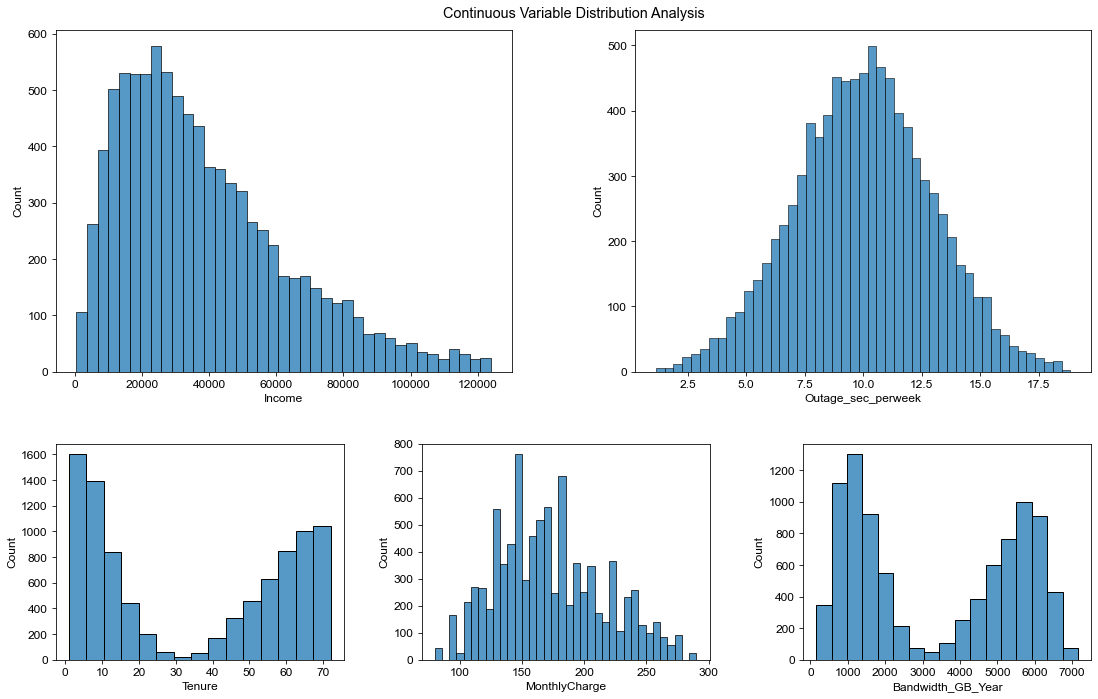

In [27]:
ax1 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Income, ax=ax1)
ax2 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Outage_sec_perweek, ax=ax2)
ax3 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Tenure, ax=ax3)
ax4 = pw.Brick(figsize=(4,3))
sns.histplot(df1.MonthlyCharge, ax=ax4)
ax5 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Bandwidth_GB_Year, ax=ax5)
stacks = (ax1|ax2)/(ax3|ax4|ax5)
stacks.set_suptitle('Continuous Variable Distribution Analysis')
stacks.savefig()

### Discrete Variables

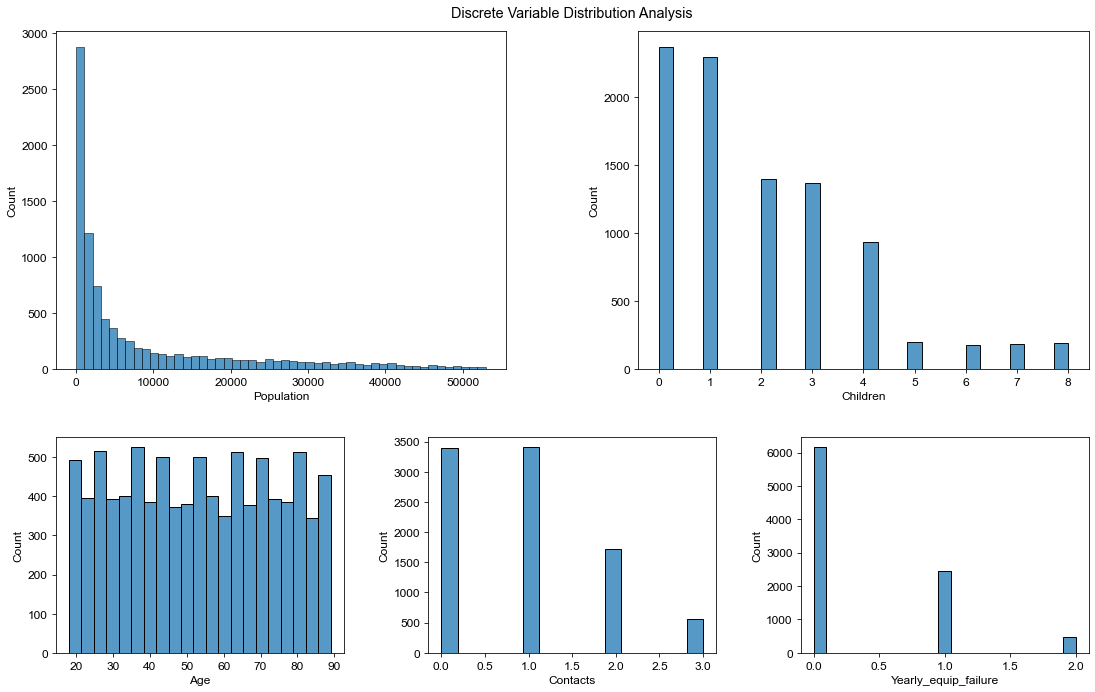

In [28]:
ax0 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Population, ax=ax0)
ax1 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Children, ax=ax1)
ax2 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Age, ax=ax2)
ax3 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Contacts, ax=ax3)
ax4 = pw.Brick(figsize=(4,3))
sns.histplot(df1.Yearly_equip_failure, ax=ax4)
stacks = (ax0|ax1)/(ax2|ax3|ax4)
stacks.set_suptitle('Discrete Variable Distribution Analysis')
stacks.savefig()

### Nominal Variables

In [29]:
## Identify variables with Yes or No values
nominal = ['Churn', 'Techie', 'Port_modem', 'Tablet', 'Phone', 'StreamingTV', 'StreamingMovies']

In [30]:
## Store value distribution in data frame
nominal_df = pd.DataFrame([df[var].value_counts() for var in nominal])

In [31]:
nominal_df

,No,Yes
Churn,6671,2425
Techie,7569,1527
Port_modem,4697,4399
Tablet,6390,2706
Phone,852,8244
StreamingTV,4613,4483
StreamingMovies,4634,4462


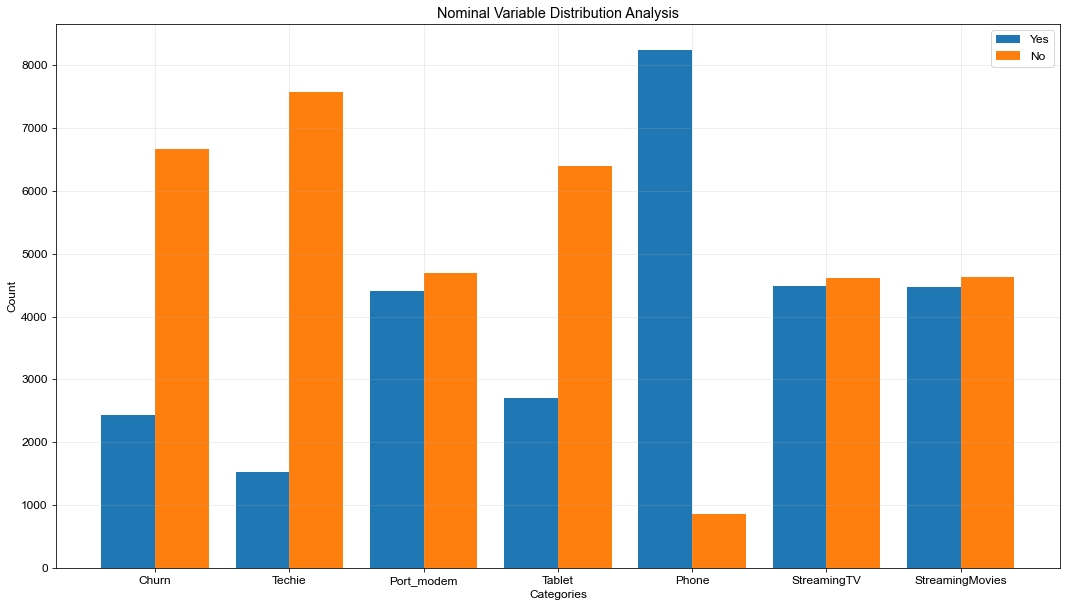

In [32]:
x_axis = np.arange(len(nominal_df.index))
plt.bar(x_axis - 0.2, nominal_df.Yes, 0.4, label='Yes')
plt.bar(x_axis + 0.2, nominal_df.No, 0.4, label='No')
plt.xticks(x_axis, nominal_df.index)
plt.title('Nominal Variable Distribution Analysis')
plt.xlabel('Categories')
plt.ylabel('Count')
plt.grid(alpha=0.25)
plt.legend()
plt.show()

In [33]:
## Get contract and internet service distributions
contract = pd.DataFrame(df.Contract.value_counts())
internet_service = pd.DataFrame(df.InternetService.value_counts())

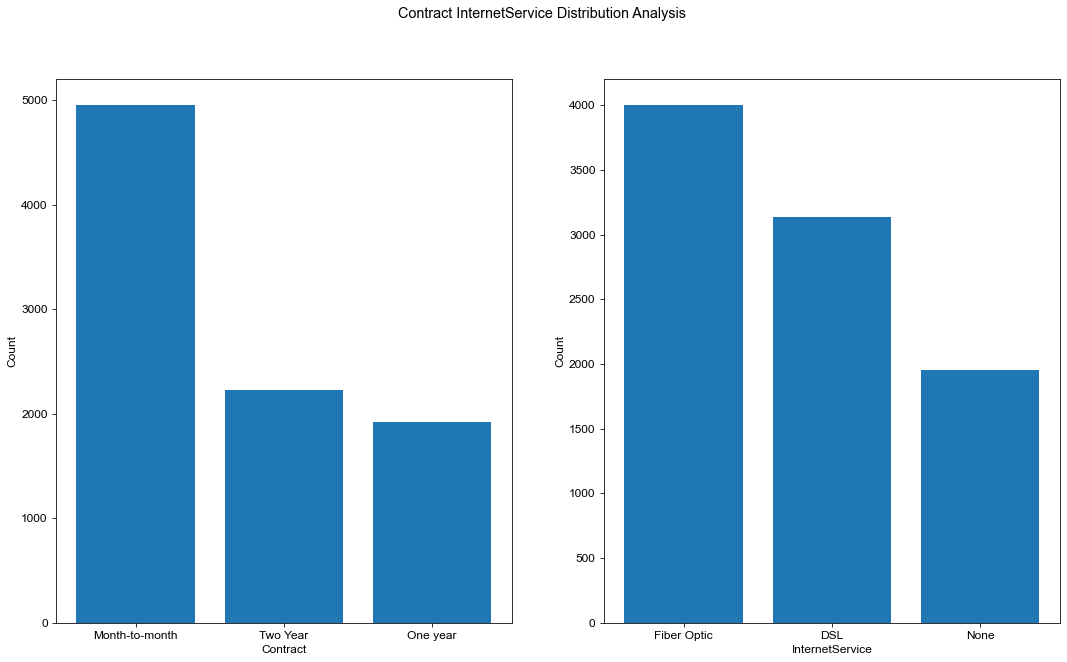

In [34]:
## Create x-axis labels
x_contract = np.arange(len(contract.index))
x_internet_service = np.arange(len(internet_service.index))

## Plot contract and internet service distributions
fig, ax = plt.subplots(1,2)
plt.suptitle('Contract InternetService Distribution Analysis')
ax[0].bar(x_contract, contract.Contract)
ax[0].set_xticks(x_contract, contract.index)
ax[0].set_xlabel('Contract')
ax[0].set_ylabel('Count')
ax[1].bar(x_internet_service, internet_service.InternetService)
ax[1].set_xticks(x_internet_service, internet_service.index)
ax[1].set_xlabel('InternetService')
ax[1].set_ylabel('Count')
plt.show()

## Bivariate Distributions

### Continuous Variables

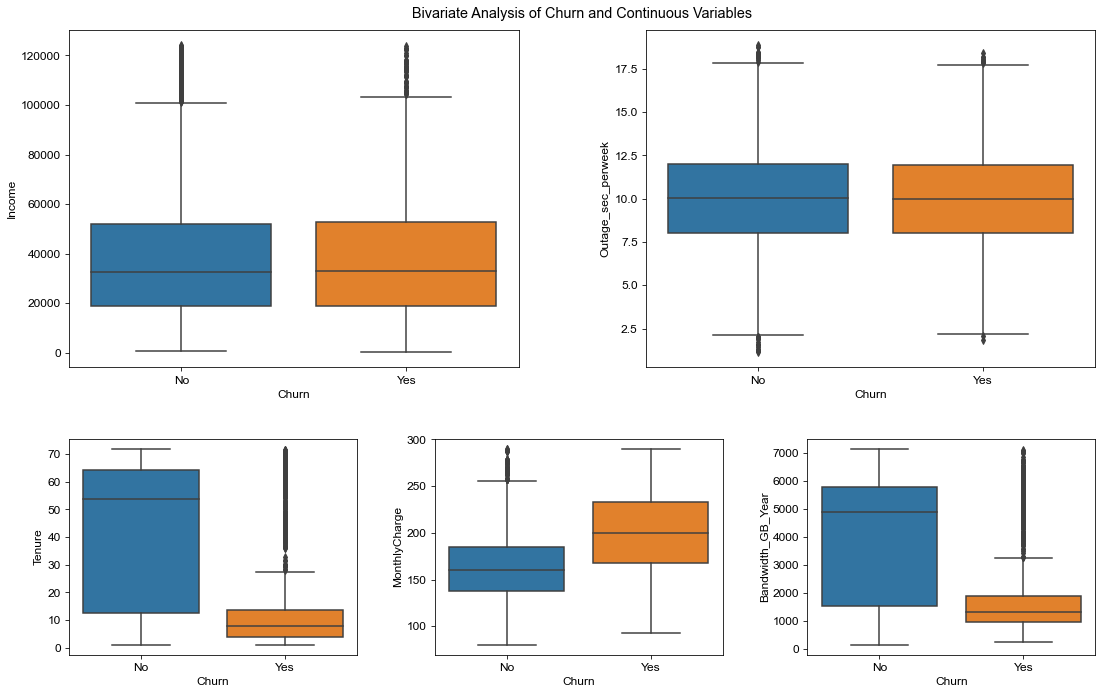

In [35]:
ax0 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Income', data=df1, ax=ax0)
ax1 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Outage_sec_perweek', data=df1, ax=ax1)
ax2 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Tenure', data=df1, ax=ax2)
ax3 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='MonthlyCharge', data=df1, ax=ax3)
ax4 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Bandwidth_GB_Year', data=df1, ax=ax4)
stacks = (ax0|ax1)/(ax2|ax3|ax4)
stacks.set_suptitle('Bivariate Analysis of Churn and Continuous Variables')
stacks.savefig()

### Discrete Variables

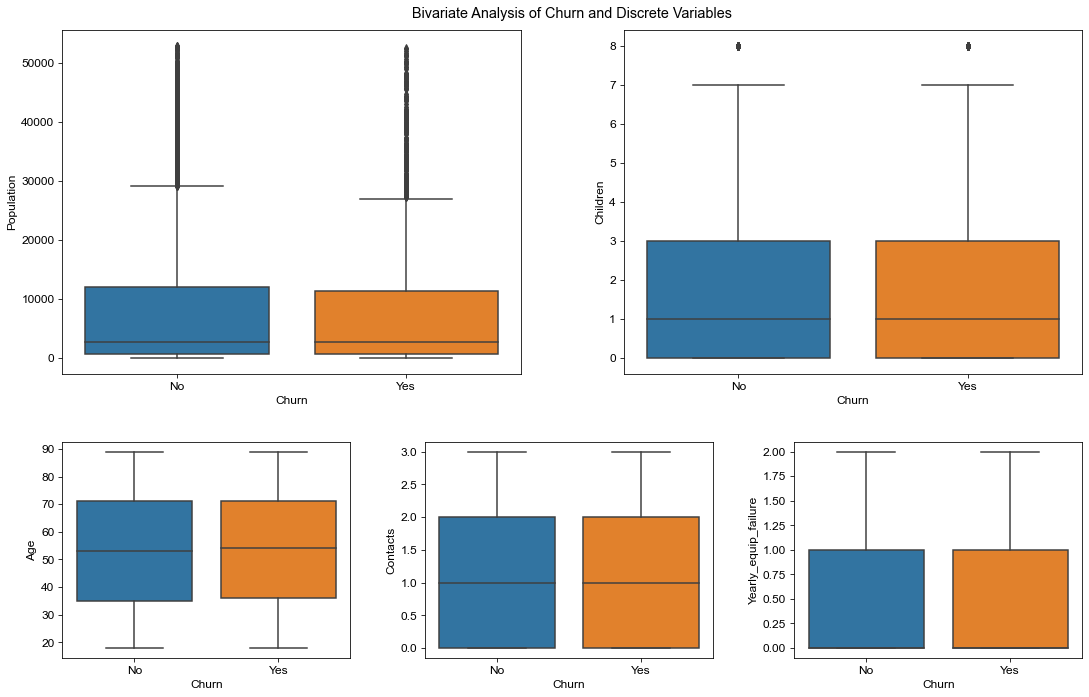

In [36]:
ax0 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Population', data=df1, ax=ax0)
ax1 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Children', data=df1, ax=ax1)
ax2 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn',  y='Age', data=df1, ax=ax2)
ax3 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Contacts', data=df1, ax=ax3)
ax4 = pw.Brick(figsize=(4,3))
sns.boxplot(x='Churn', y='Yearly_equip_failure', data=df1, ax=ax4)
stacks = (ax0|ax1)/(ax2|ax3|ax4)
stacks.set_suptitle('Bivariate Analysis of Churn and Discrete Variables')
stacks.savefig()

### Nominal Variables

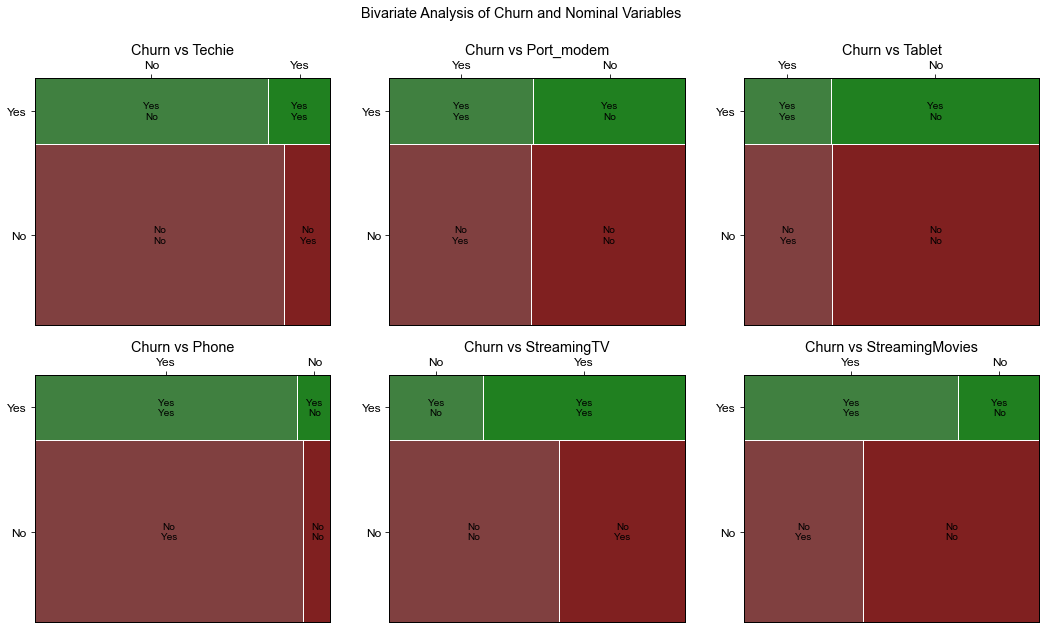

In [37]:
fig, ax = plt.subplots(2,3)
plt.suptitle('Bivariate Analysis of Churn and Nominal Variables')
mosaic(df1, ['Churn', 'Techie'], title='Churn vs Techie', horizontal=False, gap=0.005, ax=ax[0,0])
mosaic(df1, ['Churn', 'Port_modem'], title='Churn vs Port_modem', horizontal=False, gap=0.005, ax=ax[0,1])
mosaic(df1, ['Churn', 'Tablet'], title='Churn vs Tablet', horizontal=False, gap=0.005, ax=ax[0,2])
mosaic(df1, ['Churn', 'Phone'], title='Churn vs Phone', horizontal=False, gap=0.005, ax=ax[1,0])
mosaic(df1, ['Churn', 'StreamingTV'], title='Churn vs StreamingTV', horizontal=False, gap=0.005, ax=ax[1,1])
mosaic(df1, ['Churn', 'StreamingMovies'], title='Churn vs StreamingMovies', horizontal=False, gap=0.005, ax=ax[1,2])
plt.show()

### Ordinal Variables

In [38]:
## Define function to get grouped count for ordinal values
def get_ordinal_vals(var, data):
    ## Create dataframe of grouped value counts
    df = pd.DataFrame(df1.groupby([var, 'Churn'])[var].sum())
    ## Create no and yes lists of values
    no = []
    yes = []
    ## Iterate through each rating and store value counts
    for i in range(1,7):
        no.append(df.transpose()[i]['No'].values[0])
        yes.append(df.transpose()[i]['Yes'].values[0])
    ## Create dataframe to store simplified values
    temp_df = pd.DataFrame(index=np.arange(1,7), columns=['No', 'Yes'])
    temp_df['No'] = no
    temp_df['Yes'] = yes
    ## Return simplified dataframe
    return temp_df

In [39]:
## Get counts for churn by ordinal rating
timely_response = get_ordinal_vals('TimelyResponse', df1)
timely_fixes = get_ordinal_vals('TimelyFixes', df1)
timely_replacements = get_ordinal_vals('TimelyReplacements', df1)
reliability = get_ordinal_vals('Reliability', df1)
options = get_ordinal_vals('Options', df1)
respectful_response = get_ordinal_vals('RespectfulResponse', df1)
courteous_exchange = get_ordinal_vals('CourteousExchange', df1)
active_listening = get_ordinal_vals('ActiveListening', df1)

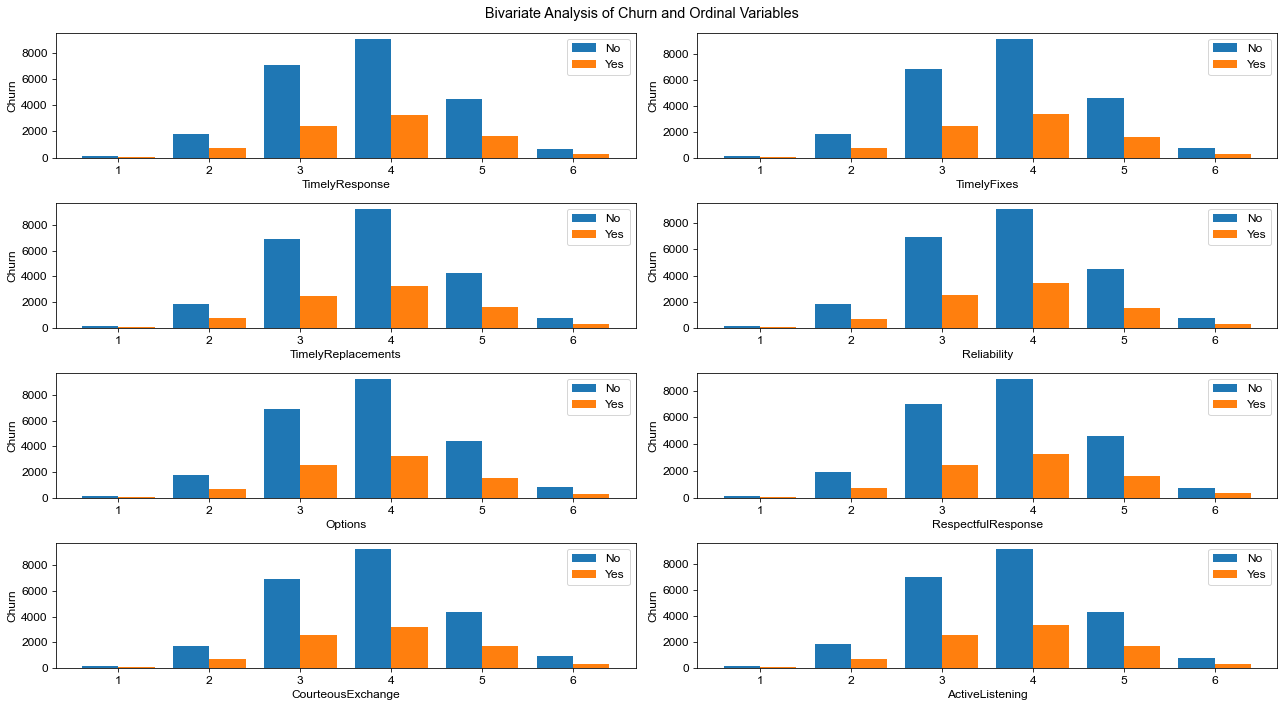

In [40]:
fig, ax = plt.subplots(4,2)
plt.suptitle('Bivariate Analysis of Churn and Ordinal Variables')
ax[0,0].bar(timely_response.index -0.2, timely_response.No, 0.4, label='No')
ax[0,0].bar(timely_response.index +0.2, timely_response.Yes, 0.4, label='Yes')
ax[0,0].set_xlabel('TimelyResponse')
ax[0,0].set_ylabel('Churn')
ax[0,0].legend()
ax[0,1].bar(timely_fixes.index -0.2, timely_fixes.No, 0.4, label='No')
ax[0,1].bar(timely_fixes.index +0.2, timely_fixes.Yes, 0.4, label='Yes')
ax[0,1].set_xlabel('TimelyFixes')
ax[0,1].set_ylabel('Churn')
ax[0,1].legend()
ax[1,0].bar(timely_replacements.index -0.2, timely_replacements.No, 0.4, label='No')
ax[1,0].bar(timely_replacements.index +0.2, timely_replacements.Yes, 0.4, label='Yes')
ax[1,0].set_xlabel('TimelyReplacements')
ax[1,0].set_ylabel('Churn')
ax[1,0].legend()
ax[1,1].bar(reliability.index -0.2, reliability.No, 0.4, label='No')
ax[1,1].bar(reliability.index +0.2, reliability.Yes, 0.4, label='Yes')
ax[1,1].set_xlabel('Reliability')
ax[1,1].set_ylabel('Churn')
ax[1,1].legend()
ax[2,0].bar(options.index -0.2, options.No, 0.4, label='No')
ax[2,0].bar(options.index +0.2, options.Yes, 0.4, label='Yes')
ax[2,0].set_xlabel('Options')
ax[2,0].set_ylabel('Churn')
ax[2,0].legend()
ax[2,1].bar(respectful_response.index -0.2, respectful_response.No, 0.4, label='No')
ax[2,1].bar(respectful_response.index +0.2, respectful_response.Yes, 0.4, label='Yes')
ax[2,1].set_xlabel('RespectfulResponse')
ax[2,1].set_ylabel('Churn')
ax[2,1].legend()
ax[3,0].bar(courteous_exchange.index -0.2, courteous_exchange.No, 0.4, label='No')
ax[3,0].bar(courteous_exchange.index +0.2, courteous_exchange.Yes, 0.4, label='Yes')
ax[3,0].set_xlabel('CourteousExchange')
ax[3,0].set_ylabel('Churn')
ax[3,0].legend()
ax[3,1].bar(active_listening.index -0.2, active_listening.No, 0.4, label='No')
ax[3,1].bar(active_listening.index +0.2, active_listening.Yes, 0.4, label='Yes')
ax[3,1].set_xlabel('ActiveListening')
ax[3,1].set_ylabel('Churn')
ax[3,1].legend()
plt.tight_layout()

In [41]:
cont = ['Population', 'Children', 'Age', 'Income', 'Outage_sec_perweek', 'Contacts', 'Yearly_equip_failure', 'Tenure',
 'MonthlyCharge', 'Bandwidth_GB_Year', 'TimelyResponse', 'TimelyFixes', 'TimelyReplacements', 'Reliability',
 'Options', 'RespectfulResponse', 'CourteousExchange', 'ActiveListening']

In [42]:
corr_coef = pd.DataFrame(index=cont, columns=['coef', 'pvalue'])
for var in cont:
    cont_var = df1[var]
    cat_var = df1['Churn']

    # Convert categorical variable to binary (0 or 1)
    binary_var = pd.get_dummies(cat_var, drop_first=True)

    # Calculate point-biserial correlation coefficient
    corr, pvalue = pointbiserialr(cont_var, binary_var)
    corr_coef.loc[var] = corr[0], pvalue

In [43]:
corr_coef.abs().sort_values('coef', ascending=False)

,coef,pvalue
Tenure,0.487759,0.0
Bandwidth_GB_Year,0.443482,0.0
MonthlyCharge,0.372983,0.0
Options,0.013249,0.206422
TimelyReplacements,0.011075,0.290892
Age,0.010934,0.297083
Contacts,0.008395,0.423404
ActiveListening,0.007965,0.447543
TimelyFixes,0.007565,0.47064
Yearly_equip_failure,0.006338,0.545584


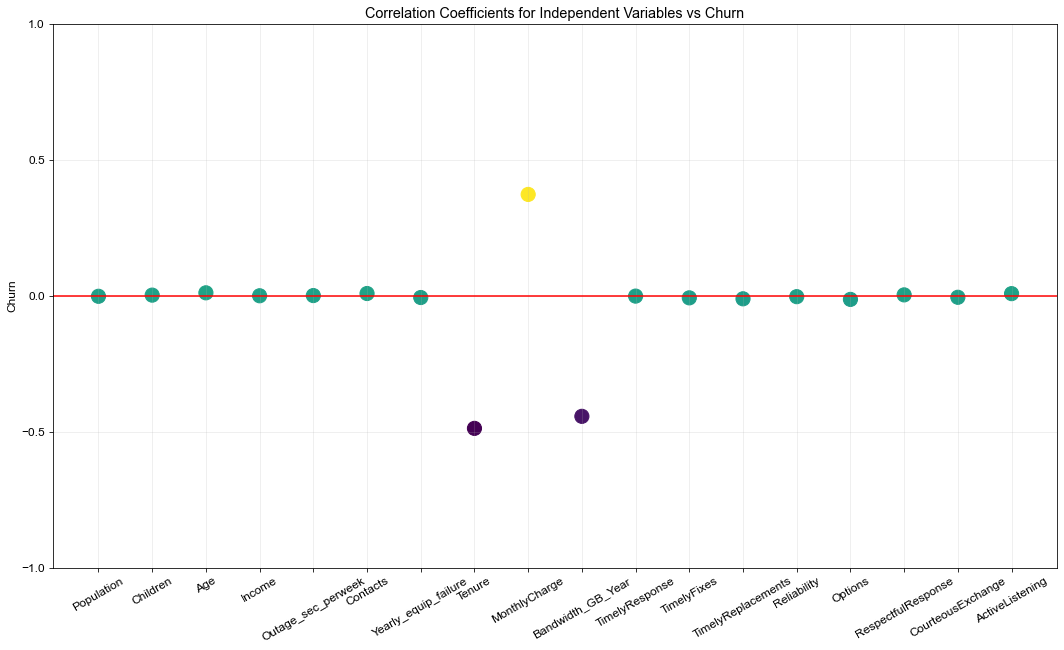

In [44]:
## Plot correlation coefficients
plt.scatter(corr_coef.index, corr_coef.coef, s=200, c=corr_coef.coef)
plt.xticks(rotation=30)
plt.grid(alpha=0.25)
plt.ylabel('Churn')
plt.axhline(y=0, color='r', linestyle='-')
plt.yticks(np.arange(-1,1.5, 0.5))
plt.title('Correlation Coefficients for Independent Variables vs Churn')
plt.show()

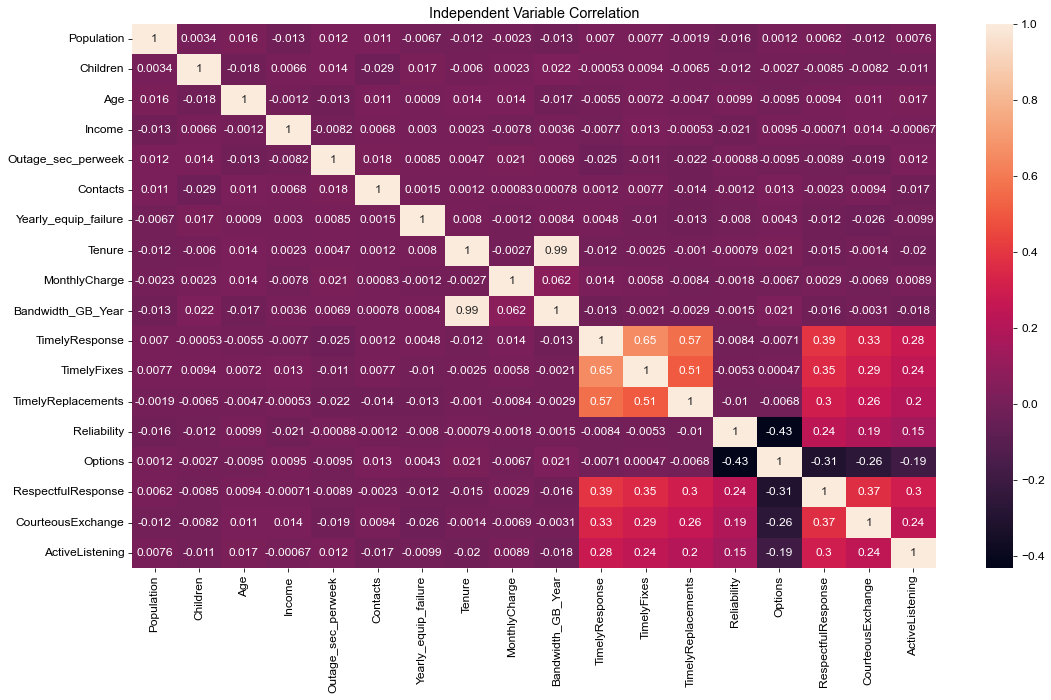

In [45]:
## Review multicollinearity
sns.heatmap(df1.corr(), annot=True)
plt.title('Independent Variable Correlation')
plt.show()

# Data Wrangling
---

In [46]:
## Create InternetDSL and InternetFiberOptic columns
dsl = []
fiber = []
for i in df1.InternetService:
    if i == 'DSL':
        dsl.append(1)
        fiber.append(0)
    elif i == 'Fiber Optic':
        dsl.append(0)
        fiber.append(1)
    else:
        dsl.append(0)
        fiber.append(0)

In [47]:
df1['InternetDSL'] = dsl
df1['InternetFiberOptic'] = fiber

In [48]:
df1.head()

,Population,Children,Age,Income,Churn,Outage_sec_perweek,Contacts,Yearly_equip_failure,Techie,Contract,...,TimelyResponse,TimelyFixes,TimelyReplacements,Reliability,Options,RespectfulResponse,CourteousExchange,ActiveListening,InternetDSL,InternetFiberOptic
0,38,0,68,28561.99,No,7.978323,0,1,No,One year,...,5,5,5,3,4,4,3,4,0,1
1,10446,1,27,21704.77,Yes,11.699080,0,1,Yes,Month-to-month,...,3,4,3,3,4,3,4,4,0,1
2,3735,4,50,9609.57,No,10.752800,0,1,Yes,Two Year,...,4,4,2,4,4,3,3,3,1,0
3,13863,1,48,18925.23,No,14.913540,2,0,Yes,Two Year,...,4,4,4,2,5,4,3,3,1,0
4,11352,0,83,40074.19,Yes,8.147417,2,1,No,Month-to-month,...,4,4,4,3,4,4,4,5,0,1


In [49]:
## Encode InternetService column
internet_service = {'DSL':'Yes', 'Fiber Optic':'Yes', 'None':'No'}
df1.InternetService.replace(internet_service, inplace=True)

In [50]:
## Initiate label encoder
le = LabelEncoder()

In [51]:
## Encode variables
for col in df1.columns:
    if 'Yes' in df1[col].values:
        df1[col] = le.fit_transform(df1[col])

In [52]:
contract = {'Month-to-month':0, 'One year':1, 'Two Year':2}
df1.Contract.replace(contract, inplace=True)

In [53]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9096 entries, 0 to 9095
Data columns (total 29 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   Population            9096 non-null   int64  
 1   Children              9096 non-null   int64  
 2   Age                   9096 non-null   int64  
 3   Income                9096 non-null   float64
 4   Churn                 9096 non-null   int64  
 5   Outage_sec_perweek    9096 non-null   float64
 6   Contacts              9096 non-null   int64  
 7   Yearly_equip_failure  9096 non-null   int64  
 8   Techie                9096 non-null   int64  
 9   Contract              9096 non-null   int64  
 10  Port_modem            9096 non-null   int64  
 11  Tablet                9096 non-null   int64  
 12  InternetService       9096 non-null   int64  
 13  Phone                 9096 non-null   int64  
 14  StreamingTV           9096 non-null   int64  
 15  StreamingMovies      

In [54]:
## Store clean data as CSV
df1.to_csv('churn_logistic_regression.csv')

# Model Comparison and Analysis
---

## Initial Model

In [55]:
## Define target and explanatory variables
X, y = df1.drop('Churn', axis=1), df1['Churn']

In [56]:
## Split training and testing samples
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [57]:
## Define initial features
current_features = X.columns.values

In [58]:
## Define function to initiate and test models
def init_mod(X_train, X_test, y_train, y_test, features):
    ## Initiate model
    mod = LogisticRegression(fit_intercept=True).fit(X_train[features], y_train)
    ## Review coefficients
    coef_df = pd.DataFrame(mod.coef_[0], index=features, columns=['coef'])
    print(coef_df)
    ## Test model
    y_pred = mod.predict(X_test[features])
    return mod, y_pred

In [59]:
## Initiate and test model
mod1, pred1 = init_mod(X_train, X_test, y_train, y_test, current_features)

                          coef
Population           -0.000003
Children             -0.028819
Age                   0.001052
Income               -0.000003
Outage_sec_perweek   -0.199842
Contacts             -0.014545
Yearly_equip_failure -0.008964
Techie                0.004931
Contract             -0.100413
Port_modem           -0.008914
Tablet               -0.006598
InternetService      -0.014065
Phone                -0.021051
StreamingTV           0.022979
StreamingMovies       0.028591
Tenure               -0.205981
MonthlyCharge         0.023504
Bandwidth_GB_Year     0.001602
TimelyResponse       -0.076121
TimelyFixes          -0.073073
TimelyReplacements   -0.076409
Reliability          -0.074983
Options              -0.075446
RespectfulResponse   -0.072217
CourteousExchange    -0.072981
ActiveListening      -0.074888
InternetDSL           0.025234
InternetFiberOptic   -0.039299


In [60]:
## Define function to plot confusion matrix
def plot_cm(y_test, y_pred, mod_name):
    ## Get confusion matrix
    cm = confusion_matrix(y_test, y_pred)
    ## Plot confusion matrix
    labels = ['Positive', 'Negative']
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=labels, yticklabels=labels)
    plt.title('Confusion Matrix: {}'.format(mod_name))
    plt.show()

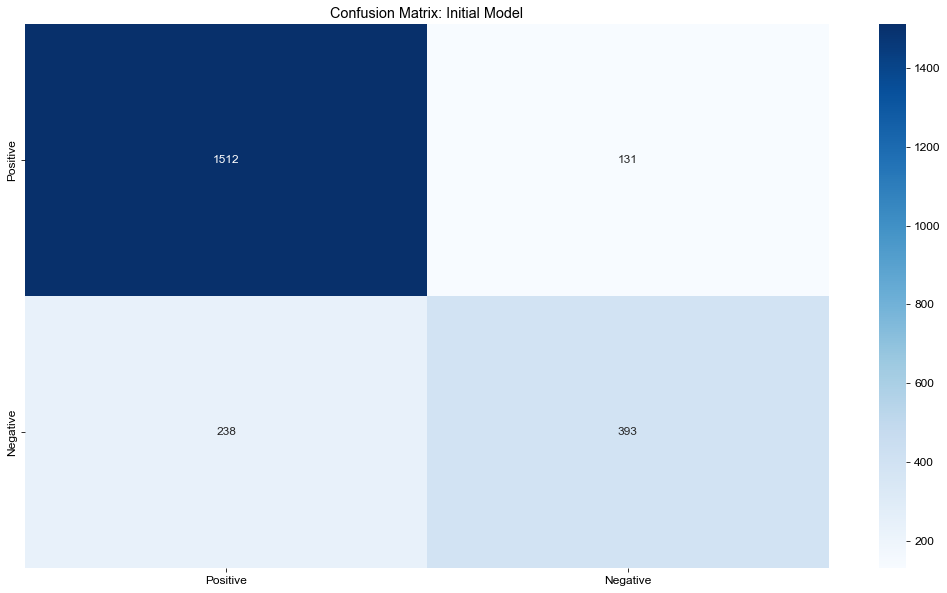

In [61]:
## Plot model 1 confusion matrix
plot_cm(y_test, pred1, 'Initial Model')

In [62]:
## Define function to score models
def score_mod(y_test, y_pred, features):
    return f1_score(y_test, y_pred), accuracy_score(y_test, y_pred), features

In [63]:
## Create dataframe for model metrics
results = pd.DataFrame(columns=['f1', 'accuracy', 'features'])

In [64]:
## Log model metrics
results.loc['InitialModel'] = score_mod(y_test, pred1, current_features)

In [65]:
## Review metrics
results

,f1,accuracy,features
InitialModel,0.680519,0.837731,"[Population, Children, Age, Income, Outage_sec..."


## Feature Selection

### Iterate Through Features

In [66]:
## Select feature with the highest correlation to the target variable
feature_1 = corr_coef.index[corr_coef.coef.abs() == max(corr_coef.coef.abs())][0]
## Create list of features already included
selected_features = [feature_1]
## Create dataframe to store model metrics
step_results = pd.DataFrame(columns=['f1', 'accuracy', 'features'])

In [67]:
## Create list of features per iteration
for i in range(len(corr_coef)-1):
    ## Initiate and test model
    mod, pred = init_mod(X_train, X_test, y_train, y_test, selected_features)
    ## Log results
    step_results.loc[i] = score_mod(y_test, pred, selected_features[:i+1])
    ## Drop already selected features
    dropped = corr_coef.drop(selected_features)
    ## Select next feature
    selected_features.append(dropped.index[dropped.coef.abs() == max(dropped.coef.abs())][0])

            coef
Tenure -0.055728
                       coef
Tenure            -0.381702
Bandwidth_GB_Year  0.003841
                       coef
Tenure            -0.278667
Bandwidth_GB_Year  0.002440
MonthlyCharge      0.026990
                       coef
Tenure            -0.279139
Bandwidth_GB_Year  0.002445
MonthlyCharge      0.026978
Options           -0.049612
                        coef
Tenure             -0.276888
Bandwidth_GB_Year   0.002431
MonthlyCharge       0.024602
Options            -0.332322
TimelyReplacements  0.091949
                        coef
Tenure             -0.296353
Bandwidth_GB_Year   0.002668
MonthlyCharge       0.023289
Options            -0.379706
TimelyReplacements  0.104937
Age                 0.007626
                        coef
Tenure             -0.315766
Bandwidth_GB_Year   0.002843
MonthlyCharge       0.027648
Options            -0.290844
TimelyReplacements  0.104770
Age                 0.012759
Contacts            0.011357
                     

In [68]:
## Review model results
step_results = step_results.sort_values('f1', ascending=False).reset_index(drop=True)
step_results

,f1,accuracy,features
0,0.685266,0.841249,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
1,0.683478,0.839930,"[Tenure, Bandwidth_GB_Year, MonthlyCharge]"
2,0.681223,0.839490,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
3,0.680484,0.837291,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
4,0.680284,0.841689,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
5,0.676345,0.833333,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
6,0.672355,0.831135,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
7,0.671782,0.830695,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
8,0.666094,0.828936,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
9,0.663830,0.826297,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."


In [69]:
## Select features from best performing model
current_features = step_results.features[0]

In [70]:
## Recreate model
mod2, pred2 = init_mod(X_train, X_test, y_train, y_test, current_features)

                        coef
Tenure             -0.296353
Bandwidth_GB_Year   0.002668
MonthlyCharge       0.023289
Options            -0.379706
TimelyReplacements  0.104937
Age                 0.007626


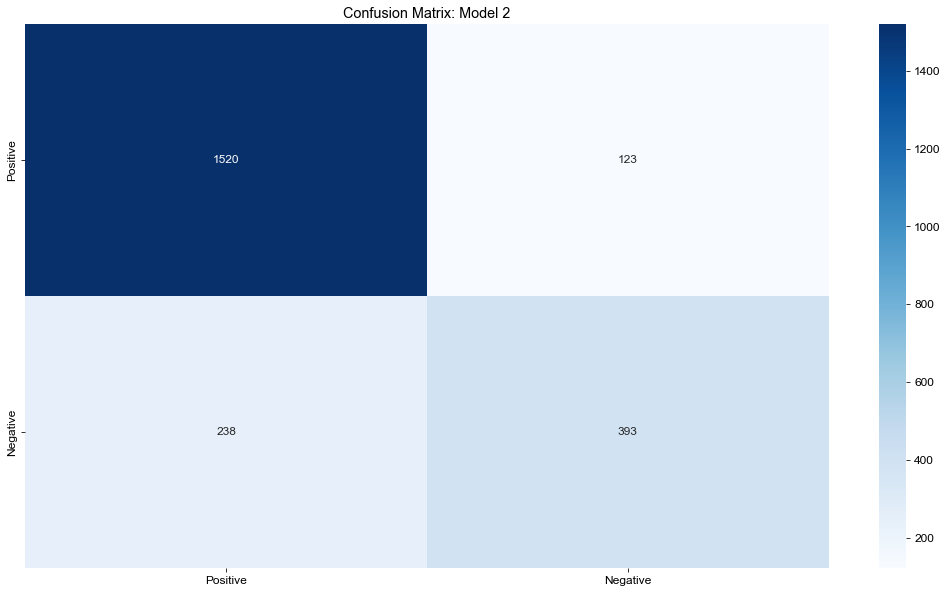

In [71]:
## Plot confusion matrix
plot_cm(y_test, pred2, 'Model 2')

In [72]:
## Log model results
results.loc['Model2'] = score_mod(y_test, pred2, current_features)

In [73]:
## Review model metrics
results

,f1,accuracy,features
InitialModel,0.680519,0.837731,"[Population, Children, Age, Income, Outage_sec..."
Model2,0.685266,0.841249,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."


In [74]:
def get_vif(X):
    ## Add constant
    X['const'] = 1.0
    ## Create dataframe to store vif values
    vif = pd.DataFrame()
    vif['Variable'] = X.columns
    vif['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif = vif[vif['Variable']!='const']
    return vif

In [75]:
## Calculate vif to check for multicollinearity
vif = get_vif(X[current_features])

In [76]:
vif

,Variable,VIF
0,Tenure,85.350771
1,Bandwidth_GB_Year,85.699847
2,MonthlyCharge,1.367356
3,Options,1.000686
4,TimelyReplacements,1.000321
5,Age,1.087517


In [77]:
## Remove variable with highest VIF
current_features = vif[vif['VIF'] != vif['VIF'].max()].Variable.values

In [78]:
## Re-calculate vif
get_vif(X[current_features])

,Variable,VIF
0,Tenure,1.000631
1,MonthlyCharge,1.000311
2,Options,1.000618
3,TimelyReplacements,1.000139
4,Age,1.000491


In [79]:
## Initiate and test reduced model
mod3, pred3 = init_mod(X_train, X_test, y_train, y_test, current_features)

                        coef
Tenure             -0.073565
MonthlyCharge       0.032932
Options            -0.029293
TimelyReplacements -0.046469
Age                 0.002607


In [80]:
## Get the intercept
mod3.intercept_[0]

-5.016258761483502

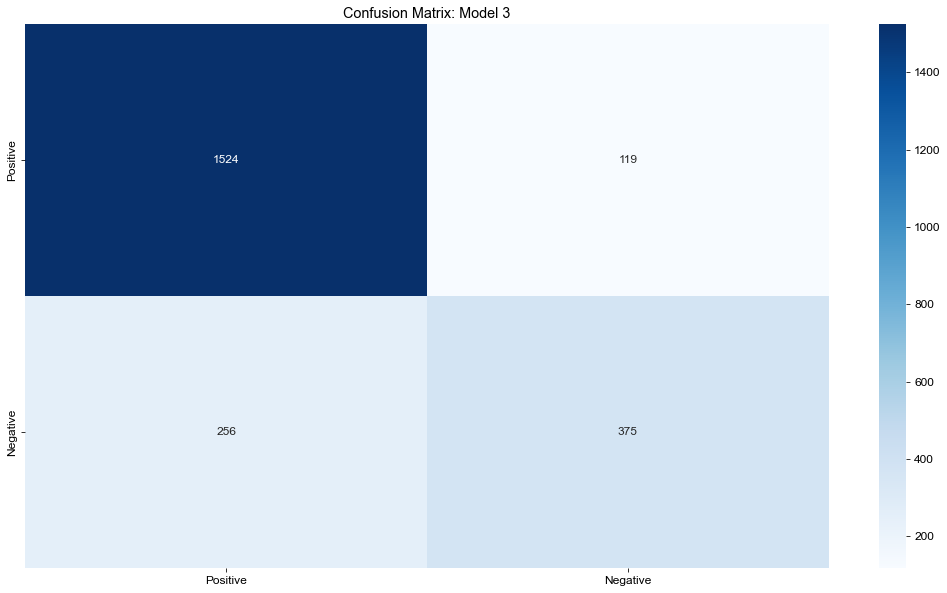

In [81]:
## Plot confusion matrix
plot_cm(y_test, pred3, 'Model 3')

In [82]:
## Log model metrics
results.loc['Model3'] = score_mod(y_test, pred3, current_features)

In [83]:
## Review metrics
results

,f1,accuracy,features
InitialModel,0.680519,0.837731,"[Population, Children, Age, Income, Outage_sec..."
Model2,0.685266,0.841249,"[Tenure, Bandwidth_GB_Year, MonthlyCharge, Opt..."
Model3,0.666667,0.835092,"[Tenure, MonthlyCharge, Options, TimelyReplace..."


In [84]:
print('Initial F1 Score:', results.f1.InitialModel)
print('Initial Accuracy Score', results.accuracy.InitialModel)
print('Initial Features:', len(results.features.InitialModel))
print('Final F1 Score:', results.f1.Model3)
print('Final Accuracy Score', results.accuracy.Model3)
print('Final Features:', len(results.features.Model3))
print('\nFinal features used:')
for n in results.features.Model3:
    print(n)

Initial F1 Score: 0.6805194805194804
Initial Accuracy Score 0.837730870712401
Initial Features: 28
Final F1 Score: 0.6666666666666666
Final Accuracy Score 0.8350923482849604
Final Features: 5

Final features used:
Tenure
MonthlyCharge
Options
TimelyReplacements
Age


In [85]:
final_df = X[current_features]
final_df['Churn'] = y

In [86]:
final_df

,Tenure,MonthlyCharge,Options,TimelyReplacements,Age,Churn
0,6.795513,172.455519,4,5,68,0
1,1.156681,242.632554,4,3,27,1
2,15.754144,159.947583,4,2,50,0
3,17.087227,119.956840,5,4,48,0
4,1.670972,149.948316,4,4,83,1
...,...,...,...,...,...,...
9091,49.921560,142.482700,3,4,46,0
9092,68.197130,159.979400,4,3,23,0
9093,47.416890,169.974100,4,4,48,0
9094,71.095600,252.624000,3,6,39,0


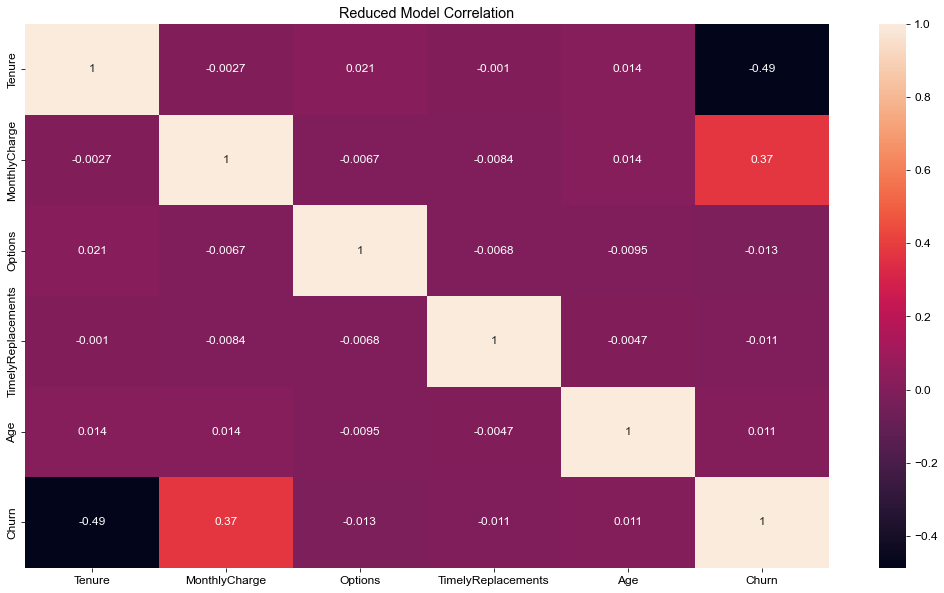

In [87]:
plt.subplot()
sns.heatmap(final_df.corr(), annot=True)
plt.title('Reduced Model Correlation')
plt.show()